# Document  Atlas.

We have an atlas circuit that provides atlas tools in the context of a circuit. 
In this notebook we look at how to use these tools.
We work with the latest set of circuits developed for /SSCx Dissemination/.

In [1]:
import numpy as np
import pandas as pd
import seaborn
from pathlib import Path
from neuro_dmt.models.bluebrain.circuit.atlas import BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import BlueBrainCircuitModel

project =\
    Path("/gpfs/bbp.cscs.ch/project")
proj83 =\
    project.joinpath("proj83")
proj64 =\
    project.joinpath("proj64")
path_atlases_sscx_dissemination =\
    proj64.joinpath(
        "dissemination",
        "data/atlas/S1/MEAN/juvenile_L23_MC_BTC_shifted_down_L1_ALL_INH")
circuit_atlas =\
    BlueBrainCircuitAtlas(
        path=path_atlases_sscx_dissemination.joinpath("Bio_0", ).as_posix())
circuit_model =\
    BlueBrainCircuitModel(
        path_circuit_data=proj83.joinpath("circuits", "Bio_0", "20191115"))

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')


Let us count the number of voxcells in each region.

In [11]:
number_voxels = pd.concat(
    pd.Series(
        ["L1", "L2", "L3", "L4", "L5", "L6"],
        name="layer"
    ).apply(
        lambda layer: pd.Series(
            ["SSp-ll", "SSp-ul", "SSp-sh", "SSp-tr"],
            name="region"
        ).apply(
            lambda region: pd.Series({
                "region": region,
                "layer": layer,
                 "number_voxels": circuit_atlas.get_mask(
                     region=region, layer=layer
                 ).sum()})
        )
    ).values
).set_index(
    ["region", "layer"])

Lets count the number of cells in each voxcell

In [14]:
XYZ = ["x", "y", "z"]
some_cells = circuit_model.cells.sample(n=5)
some_cells[XYZ]

,x,y,z
83498,2785.999734,1636.705404,-922.007429
956677,2341.905100,114.596052,-1229.565068
1450424,1985.188901,1032.774044,-1331.601749
485772,3156.349334,-1717.256262,-3005.883054
16691,4128.685146,-1285.643973,-1908.327475


In [17]:
circuit_atlas.voxel_data.positions_to_indices(
    some_cells[XYZ].values)

array([[281, 246,  20],
       [270, 207,  28],
       [261, 231,  30],
       [291, 160,  73],
       [316, 171,  45]])

In [128]:
voxel_cell_count_array =\
    np.zeros(shape=circuit_atlas.voxel_data.shape)

assert voxel_cell_count_array.shape == circuit_atlas.voxel_data.shape
assert voxel_cell_count_array.sum() == 0

In [48]:
some_indexes =\
    circuit_atlas.voxel_data.positions_to_indices(some_cells[XYZ].values)
circuit_atlas.voxel_data._lookup_by_indices(some_indexes)

array([1127, 1128, 1129, 1124, 1121], dtype=uint16)

In [49]:
tuple(some_indexes.transpose())

(array([281, 270, 261, 291, 316]),
 array([246, 207, 231, 160, 171]),
 array([20, 28, 30, 73, 45]))

In [100]:
voxel_cell_count_array[tuple(some_indexes.transpose())]

array([0., 0., 0., 0., 0.])

In [101]:
some_indexes = np.array([[281, 246, 20], [281, 246, 20]])
voxel_cell_count_array[tuple(some_indexes.transpose())]

array([0., 0.])

In [40]:
voxel_cell_counts[tuple(some_indexes.transpose())] += 1
voxel_cell_counts[tuple(some_indexes.transpose())]

array([3., 3.])

In [43]:
some_cells[XYZ].apply(
    lambda row: (row.x, row.y, row.z),
    axis=1)

83498      (2785.999734407211, 1636.7054040165385, -922.0...
956677     (2341.905100483127, 114.59605157158876, -1229....
1450424    (1985.188900932426, 1032.7740440262587, -1331....
485772     (3156.3493338274857, -1717.2562620786512, -300...
16691      (4128.685145704474, -1285.6439733212856, -1908...
dtype: object

In [81]:
XYZ = ["x", "y", "z"]
sample_cells =\
    circuit_model.cells#.sample(n=10)
voxel_indexed_cells =\
    pd.DataFrame(
    sample_cells.index.values,
    columns=["gid"],
    index=pd.Series(
        list(
            circuit_atlas.voxel_data.positions_to_indices(
                sample_cells[XYZ].values)
        )
    ).apply(
        tuple
    ).values
)


We have implemented a method in `BlueBrainCircuitModel` that indexes cell gids 
by there voxel indices in the associated atlas:

In [6]:
#circuit_model.voxel_indexed_cell_gids

We can test our method by checking that the voxel ids are good:

In [4]:
vicgids = circuit_model.voxel_indexed_cell_gids

#vicgids.index =\
    #pd.MultiIndex.from_tuples(vicgids.index.values, names=["i", "j", "k"])
vicgids.loc[(305, 279, 16)].values

/home/muchu/.vmgr_repo/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


array([     1, 308519])

In [7]:
sample_cell_positions =\
    circuit_model.cells.sample(n=20)[xyz]
sample_cell_voxel_indices =\
    circuit_model.atlas.voxel_data.positions_to_indices(
        sample_cell_positions.values
    )
for gid, ijk in zip(
    sample_cell_positions.index.values,
    sample_cell_voxel_indices
):
    assert gid in vicgids.loc[tuple(ijk)].values,\
        "Not found gid {} among gids in a voxel: {}"\
        .format(gid, vicgids.loc[tuple(ijk)].values)

/home/muchu/.vmgr_repo/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()


In [44]:
import time
import sys

toolbar_width = 40

# setup toolbar
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['

xyz = ["x", "y", "z"]
sample_cell_positions =\
    circuit_model.cells.sample(n=10000)[xyz]
sample_cell_voxel_indices =\
    circuit_model.atlas.voxel_data.positions_to_indices(
        sample_cell_positions.values
    )
percent_done = 0
N = 100
n = 0
for gid, ijk in zip(
    sample_cell_positions.index.values,
    sample_cell_voxel_indices
):
    assert gid in circuit_model.voxel_indexed_cell_gids.loc[
        tuple(ijk)
    ].values,\
    "Not found gid {} among gids in a voxel: {}"\
    .format(
        gid,
        circuit_model.vovoxel_indexed_cell_gids.loc[tuple(ijk)].values
    )
    if n % N == 1:
        next_percent_done =\
            100 * np.round(np.float(n)/sample_cell_positions.shape[0], 2)
        if next_percent_done >= percent_done + .1:
            percent_done = next_percent_done
            sys.stdout.write(
                " {}%".format(percent_done))
            sys.stdout.flush()
    n += 1
    

[                                        

/home/muchu/.vmgr_repo/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.


 1.0% 2.0% 3.0% 4.0% 5.0% 6.0% 7.000000000000001% 8.0% 9.0% 10.0% 11.0% 12.0% 13.0% 14.000000000000002% 15.0% 16.0% 17.0% 18.0% 19.0% 20.0% 21.0% 22.0% 23.0% 24.0% 25.0% 26.0% 27.0% 28.000000000000004% 28.999999999999996% 30.0% 31.0% 32.0% 33.0% 34.0% 35.0% 36.0% 37.0% 38.0% 39.0% 40.0% 41.0% 42.0% 43.0% 44.0% 45.0% 46.0% 47.0% 48.0% 49.0% 50.0% 51.0% 52.0% 53.0% 54.0% 55.00000000000001% 56.00000000000001% 56.99999999999999% 57.99999999999999% 59.0% 60.0% 61.0% 62.0% 63.0% 64.0% 65.0% 66.0% 67.0% 68.0% 69.0% 70.0% 71.0% 72.0% 73.0% 74.0% 75.0% 76.0% 77.0% 78.0% 79.0% 80.0% 81.0% 82.0% 83.0% 84.0% 85.0% 86.0% 87.0% 88.0% 89.0% 90.0% 91.0% 92.0% 93.0% 94.0% 95.0% 96.0% 97.0% 98.0% 99.0%

In [38]:
sys.stdout.write(('-' if int(gid % 2)==0 else '|'))

-

In [10]:
for u, v in zip(sample_cell_positions.index.values, sample_cell_voxel_indices):
    print(u, ";", v)

1383496 ; [301 166  28]
1592069 ; [287 198  48]
148646 ; [305 232  29]
858280 ; [296 218  55]
269233 ; [287 210  31]
244064 ; [323 197  39]
1285842 ; [326 140  49]
1165080 ; [291 165  25]
697209 ; [259 212  56]
1286620 ; [329 189  42]
931704 ; [269 260  21]
465529 ; [267 194  50]
336907 ; [289 273  39]
135402 ; [296 182  30]
221324 ; [268 240  20]
1712349 ; [299 210  51]
1351156 ; [328 180  46]
1210592 ; [277 187  18]
491279 ; [268 187  53]
1219746 ; [322 195  36]


In [7]:
sample_cells =\
    circuit_model.cells
voxel_indexed_cell_gids =\
    pd.Series(
        sample_cells.index.values,
    index=pd.Series(
        list(
            circuit_atlas.voxel_data.positions_to_indices(
                sample_cells[XYZ].values)
        )
    ).apply(tuple)
)

NameError: name 'XYZ' is not defined

In [108]:
voxel_indexed_cell_gids.index

Index([(305, 279, 16), (315, 140, 34), (309, 141, 29), (305, 239, 22),
       (298, 182, 21), (311, 172, 32), (299, 170, 23), (326, 186, 33),
       (332, 209, 36), (295, 227, 17),
       ...
       (275, 181, 41), (280, 197, 43), (305, 185, 50), (308, 213, 52),
       (275, 197, 39), (294, 273, 34), (293, 207, 49), (283, 175, 41),
       (270, 193, 33), (297, 258, 37)],
      dtype='object', length=1783178)

In [119]:
voxel_indexed_cell_gids.loc[
    set(zip(*np.where(depth_mask))).intersection(voxel_indexed_cell_gids.index)
].dropna(
).astype(np.int64)

(278, 204, 12)      4045
(278, 204, 12)    302522
(302, 225, 17)    288194
(290, 208, 14)    300500
(290, 208, 14)    301515
                   ...  
(309, 243, 20)    287716
(254, 231, 43)    577973
(254, 231, 43)    617004
(254, 231, 43)    667709
(288, 236, 14)    283714
Length: 10205, dtype: int64

In [21]:
voxel_cell.head().apply(.)
    lambda xyz: pd.Series(dict(i=xyz[0], j=xyz[1], k=xyz[2])))

,i,j,k
1,305,279,16
2,315,140,34
3,309,141,29
4,305,239,22
5,298,182,21


In [45]:
def jinga(): return "binga"

In [47]:
_= jinga()rray

In [52]:
np.array(np.where(depth_mask)).transpose()

array([[252, 247,  42],
       [252, 247,  43],
       [252, 247,  44],
       ...,
       [389, 253, 113],
       [389, 254, 110],
       [389, 255, 109]])

In [120]:
xs = pd.Series(range(10), index=[1,1,2,2,3,3,4,4,5,6])

In [123]:
xs

1    0
1    1
2    2
2    3
3    4
3    5
4    6
4    7
5    8
6    9
dtype: int64

In [127]:
xs.loc[{1,2,7}.intersection(xs.index)]

1    0
1    1
2    2
2    3
dtype: int64

In [49]:
xs = np.array([x % 2 for x in range(10)])
np.where(xs)

(array([1, 3, 5, 7, 9]),)

In [51]:
mask_depth = circuit_atlas.get_mask(depth=(0., 25.))

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/atlas/principal_axis.py:114: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(_bin[0] <= values, values < _bin[1])
/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/atlas/principal_axis.py:114: RuntimeWarning: invalid value encountered in less
  return np.logical_and(_bin[0] <= values, values < _bin[1])


In [71]:
visible_voxel_ids =[
    tuple(ijk) for ijk in zip(
        *np.where(
            mask_depth
        )
    )
]

In [72]:
visible_voxel_ids

[(252, 247, 42),
 (252, 247, 43),
 (252, 247, 44),
 (252, 248, 40),
 (252, 248, 41),
 (252, 248, 42),
 (252, 248, 46),
 (252, 249, 39),
 (252, 249, 40),
 (252, 250, 39),
 (253, 240, 42),
 (253, 240, 43),
 (253, 240, 44),
 (253, 240, 45),
 (253, 240, 46),
 (253, 241, 38),
 (253, 241, 39),
 (253, 241, 40),
 (253, 241, 41),
 (253, 241, 42),
 (253, 242, 35),
 (253, 242, 36),
 (253, 242, 37),
 (253, 242, 38),
 (253, 243, 32),
 (253, 243, 33),
 (253, 243, 34),
 (253, 243, 35),
 (253, 244, 29),
 (253, 244, 30),
 (253, 244, 31),
 (253, 244, 32),
 (253, 245, 25),
 (253, 245, 26),
 (253, 245, 27),
 (253, 245, 28),
 (253, 245, 29),
 (253, 246, 22),
 (253, 246, 23),
 (253, 246, 24),
 (253, 246, 25),
 (253, 247, 21),
 (253, 247, 22),
 (253, 248, 20),
 (253, 248, 21),
 (253, 249, 20),
 (253, 250, 20),
 (254, 229, 49),
 (254, 229, 50),
 (254, 229, 51),
 (254, 229, 52),
 (254, 230, 46),
 (254, 230, 47),
 (254, 230, 48),
 (254, 230, 49),
 (254, 230, 54),
 (254, 231, 42),
 (254, 231, 43),
 (254, 231, 44

In [73]:
circuit_model.voxel_indexed_cell_gids.head()

i    j    k 
305  279  16    1
315  140  34    2
309  141  29    3
305  239  22    4
298  182  21    5
dtype: int64

In [10]:
circuit_atlas.voxel_data.offset

array([-8124.929 , -7919.9985,  -144.4   ], dtype=float32)

In [11]:
circuit_atlas.voxel_data.voxel_dimensions

array([ 38.7348,  38.7348, -38.7348], dtype=float32)

In [13]:
XYZ = ["x", "y", "z"]
circuit_model.cells.sample(n=10)[XYZ]

,x,y,z
1431108,4103.591709,-168.606029,-2677.878007
1481979,3389.697872,1988.290160,-1562.365013
196846,2605.603047,-1147.290149,-1219.313870
1731361,2662.959787,-1321.809414,-1752.109877
1676363,2070.817933,529.826929,-1311.953640
202525,3019.451565,-1504.186800,-1252.315786
1185484,3524.592106,499.581011,-1002.947692
534499,1858.374380,1231.994867,-1952.958205
1528209,3298.469488,2489.703324,-1327.747311
1563170,3698.418524,1163.003004,-1935.472158


In [17]:
(circuit_model.cells["z"].min(), circuit_model.cells["z"].max())

(-3547.9462200685794, -377.12950971180476)

In [19]:
np.floor(circuit_model.cells.sample(n=10).z / circuit_atlas.voxel_data.voxel_dimensions[2])

1647075    48.0
1518725    43.0
1141839    31.0
1151273    25.0
348568     62.0
1273085    16.0
1413861    17.0
1318038    31.0
1704788    37.0
1234804    25.0
Name: z, dtype: float64

In [24]:
circuit_model.cells.orientation[1]

array([[ 0.77548338,  0.27915564,  0.56630173],
       [-0.55331235, -0.13151579,  0.82252601],
       [ 0.30409039, -0.951197  ,  0.05247196]])

In [46]:
circuit_model.cells.get({"mtype": "L5_TPC:A"}).head()

,mtype
1,L1_DAC
2,L1_DAC
3,L1_DAC
4,L1_DAC
5,L1_DAC


In [49]:
circuit_model.get_cells(mtype="L5_TPC:A").columns

Index(['x', 'y', 'z', 'orientation', 'etype', 'exc_mini_frequency',
       'inh_mini_frequency', 'layer', 'me_combo', 'morph_class', 'morphology',
       'mtype', 'region', 'synapse_class', 'gid'],
      dtype='object')

In [86]:
xyz = ["x", "y", "z"]
xyzo = ["x", "y", "z", "orientation"]
orientations_l5 =\
    circuit_model.get_cells(layer="L5")[xyzo]
print(orientations_l5.shape)
orientations_l4=\
    circuit_model.get_cells(layer="L4")[xyzo]
print(orientations_l4.shape)

(368052, 4)
(288534, 4)


In [156]:
fix = np.array([
            np.ones(3),
            np.ones(3),
            -1. * np.ones(3)
        ])
for _, orientation in orientations_l5.sample(n=1).iterrows():
    print(orientation.orientation)
    print(fix * orientation.orientation)
    
print("0------------------")
for _, orientation in orientations_l5.sample(n=1).iterrows():
    print(np.dot(orientation.orientation, [0, 1, 0]))
    print(np.dot(fix * orientation.orientation, [0, 1, 0]))

[[-0.73832102  0.27900056  0.61403645]
 [-0.67444599 -0.3024986  -0.6735111 ]
 [-0.0021648  -0.91140182  0.41151188]]
[[-0.73832102  0.27900056  0.61403645]
 [-0.67444599 -0.3024986  -0.6735111 ]
 [ 0.0021648   0.91140182 -0.41151188]]
0------------------
[ 0.37574553 -0.12326044 -0.91848907]
[ 0.37574553 -0.12326044  0.91848907]


In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

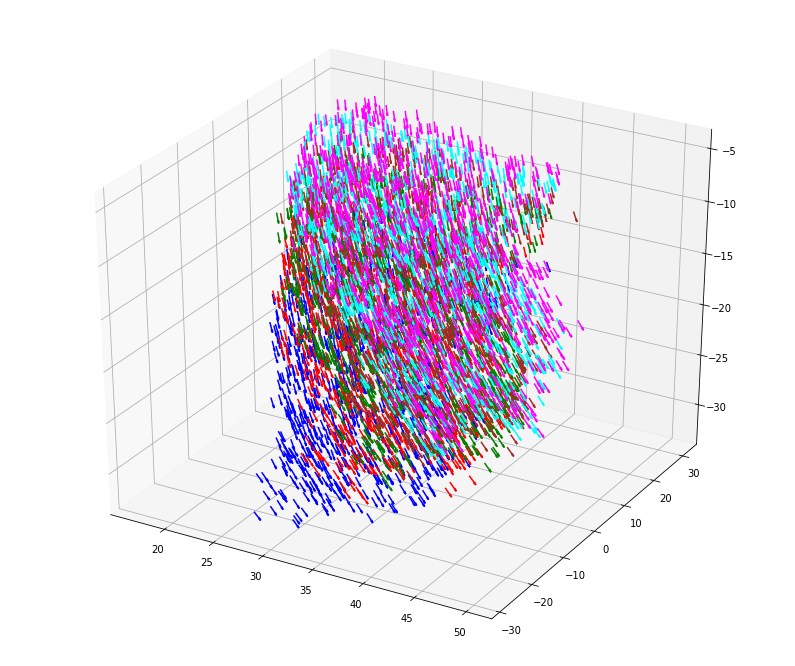

In [182]:
n = 1000
sample_cells = {
    layer: circuit_model.get_cells(layer=layer).sample(n=n)
    for layer in ["L1", "L2", "L3", "L4", "L5", "L6"]
}
def _quivers(_ax, dataframe, color, fix_orientation = 1.):
    for _, orientation in dataframe.iterrows():
        fix = np.array([
            np.ones(3),
            np.ones(3),
            fix_orientation * np.ones(3)
        ])
        position = orientation[xyz].values / 100
        #position = np.zeros(3)
        direction = np.dot(fix * orientation.orientation, [0., 1., 0]) 
        _ax.quiver(
            *tuple(position), *tuple(direction),
            color=color
        )
    
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

_quivers(ax,
         sample_cells["L1"],
         color="magenta")
_quivers(ax,
         sample_cells["L2"],
         color="cyan")
_quivers(ax,
         sample_cells["L3"],
         color="brown")
_quivers(ax,
         sample_cells["L4"],
         color="green")
_quivers(ax,
         sample_cells["L5"],
         color="red")
_quivers(ax,
         sample_cells["L6"],
         color="blue")

#ax.set_xlim([0., 200.])
#ax.set_ylim([-100, 100])
#ax.set_zlim([-100, 10])
plt.show()
fig.savefig("original_orientations.png", dpi=100)

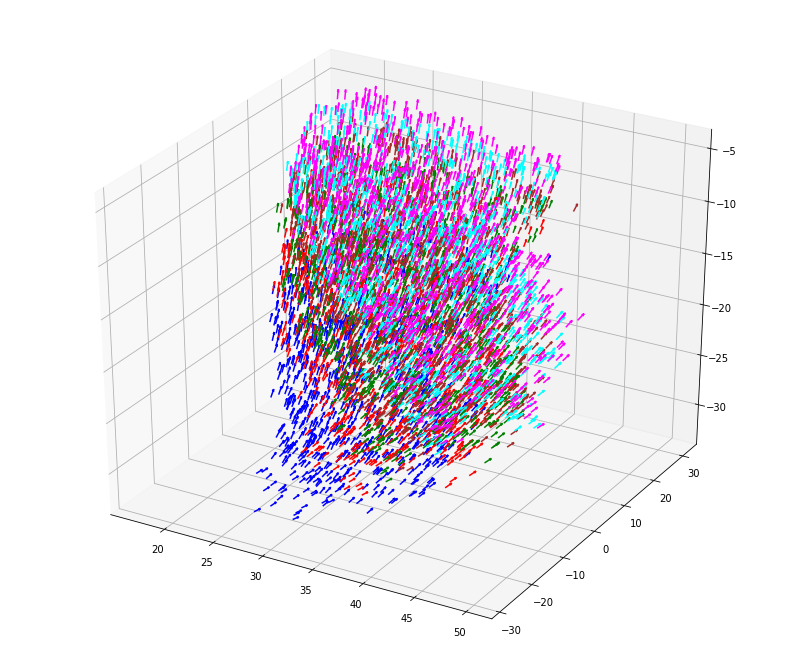

In [183]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')


_quivers(ax,
         sample_cells["L1"],
         color="magenta",
         fix_orientation=-1)
_quivers(ax,
         sample_cells["L2"],
         color="cyan",
         fix_orientation=-1)
_quivers(ax,
         sample_cells["L3"],
         color="brown",
         fix_orientation=-1)
_quivers(ax,
         sample_cells["L4"],
         color="green",
         fix_orientation=-1)
_quivers(ax,
         sample_cells["L5"],
         color="red",
         fix_orientation=-1)
_quivers(ax,
         sample_cells["L6"],
         color="blue",
         fix_orientation=-1)
fig.savefig("original_orientations_fixed.png", dpi=100)

In [43]:
orientation = circuit_model.cells.orientation[1]
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0., 0., 0., *tuple(np.dot(orientation, [0., 1., 0])))
ax.set_xlim([-1, 0.5])
ax.set_ylim([-1, 1.5])
ax.set_zlim([-1, 8])
plt.show()

In [179]:
pwd

'/Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/atlas/test'

(-1, 1)

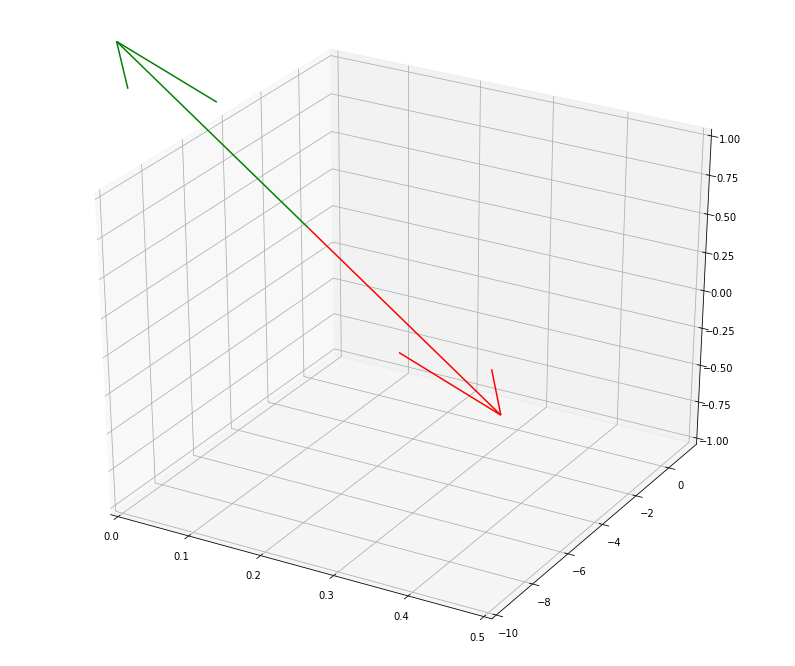

In [121]:
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')
orientation = circuit_model.cells.orientation[1]
unit_vector_original =\
    np.dot(orientation, [0, 1, 0])
unit_vector_xy_reflection =\
    np.dot(orientation  * np.array([1., -1., 1.]), [0, 1, 0])
ax.quiver(0., 0., 0., *tuple(unit_vector), color="red")
ax.quiver(0., 0., 0., *tuple(unit_vector_xy_reflection), color="green")
ax.set_xlim([0, 0.5])
ax.set_ylim([-10, 1.5])
ax.set_zlim([-1, 1])

In [175]:
(circuit_model.cells.z < 0).sum()

1783178

In [113]:
orientation

array([[ 0.77548338,  0.27915564,  0.56630173],
       [-0.55331235, -0.13151579,  0.82252601],
       [ 0.30409039, -0.951197  ,  0.05247196]])

In [114]:
orientation * np.array([1., -1., 1.])

array([[ 0.77548338, -0.27915564,  0.56630173],
       [-0.55331235,  0.13151579,  0.82252601],
       [ 0.30409039,  0.951197  ,  0.05247196]])